In [1]:
import pandas as pd

# Data Loading
Merge all the reports into one.

In [2]:
# computer:
import socket
hostname = socket.gethostname()

if hostname == 'arch':
    directory = '/home/sergio/Documents/TELMEX/Productividad/Datos/2020/rda/'
else:
    directory = '/home/sergio/Documents/Telmex/Productividad/Data/2020/rda/'

file_prefix = 'rdat_metro'

df = pd.DataFrame()

import os
rda_files = []
columns = []
for f in os.listdir(directory):
    if f.startswith(file_prefix):
        df_tmp = pd.read_excel(directory + f, sheet_name='base')
        #print(f, '-', df_tmp.shape)
        columns.append(df_tmp.columns)
        df = df.append(df_tmp)
        
#print(df.shape)

# ==============
# Split data by types
# ==============
date_cols = df.select_dtypes('datetime')
int_cols = df.select_dtypes('number')
obj_cols = df.select_dtypes(object)

# Plotting

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# Análisis por hora

In [3]:
cols = [
    'HORATLMI',
    'HORACTEI',
    'HORATLMF',
    'HORA_REAL',
]

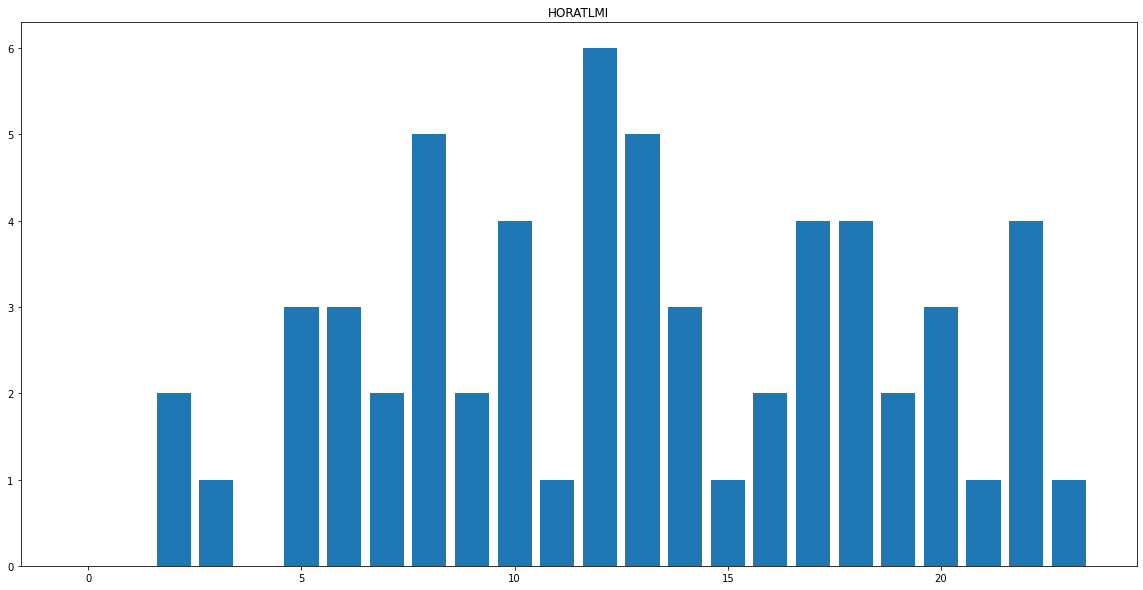

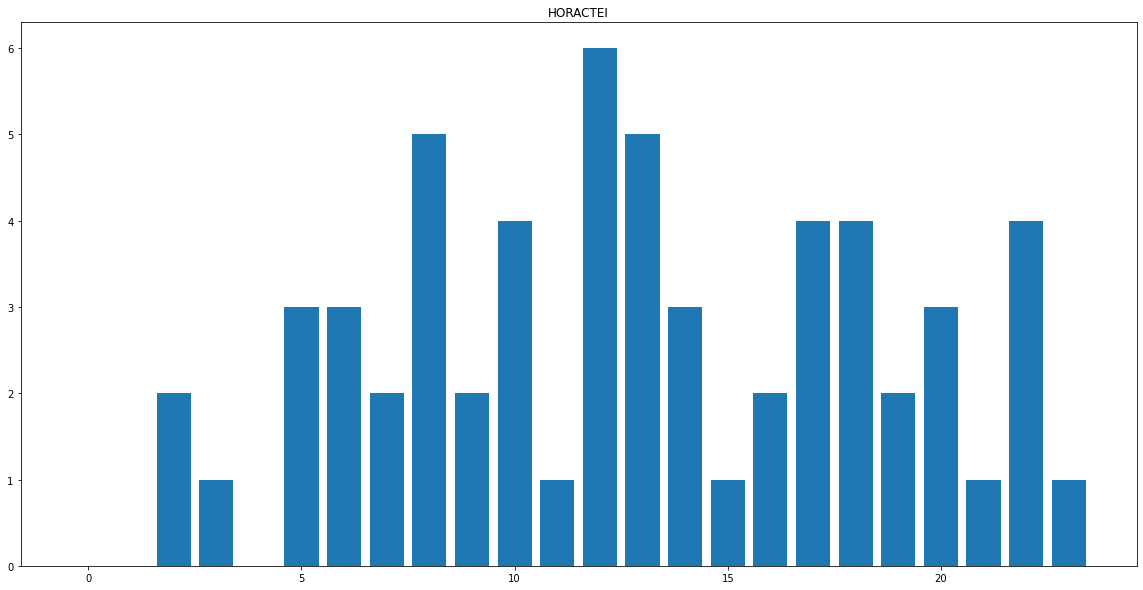

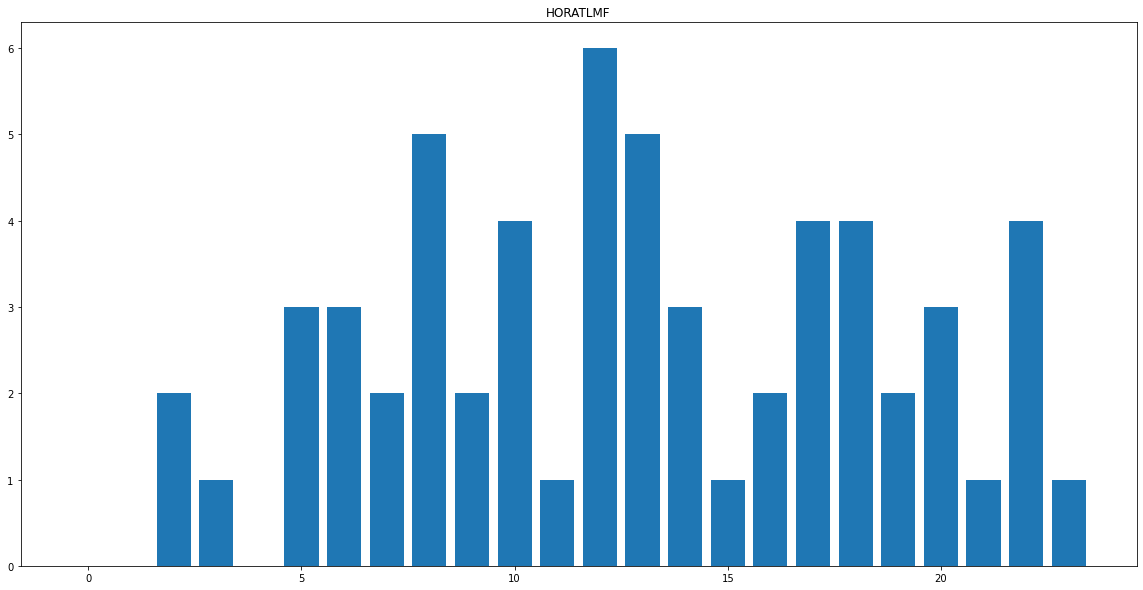

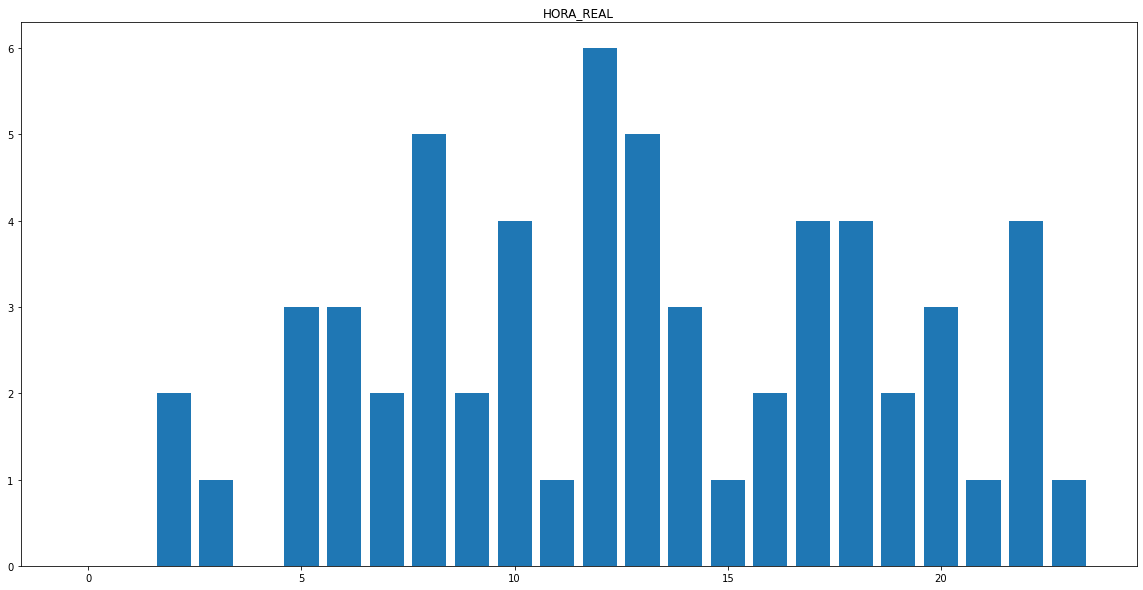

In [6]:
for col in cols:
    # remove nan values
    hour_data = obj_cols[obj_cols['HORATLMI'].notna()]
    # extract hour as int
    time_df = pd.DataFrame(hour_data[hour_data['CMANTENI'] == 'CMABS']['HORATLMI'].astype(str).str[:2].astype(int))
    
    xy = time_df.value_counts().sort_index()
    
    xs, ys = [], []

    xs = [x for x in range(24)]

    for h in range(24):
        try:
            ys.append(xy[h])
        except KeyError:
            ys.append(0)
            
    
    plt.bar(xs, ys)
    plt.title(col)
    plt.show()